In [3]:
# extract training samples
import os
import zipfile
import tensorflow as tf

local_zip = '/Users/harryx113/Downloads/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/Users/harryx113/Downloads/horse-or-human')
local_zip = '/Users/harryx113/Downloads/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/Users/harryx113/Downloads/validation-horse-or-human')
zip_ref.close()

In [4]:
# Directory with our training horse pictures
train_horse_dir = os.path.join('/Users/harryx113/Downloads/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/Users/harryx113/Downloads/horse-or-human/humans')

# Directory with our training horse pictures
validation_horse_dir = os.path.join('/Users/harryx113/Downloads/validation-horse-or-human/horses')

# Directory with our training human pictures
validation_human_dir = os.path.join('/Users/harryx113/Downloads/validation-horse-or-human/humans')

In [5]:
train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)

validation_horse_hames = os.listdir(validation_horse_dir)
validation_human_names = os.listdir(validation_human_dir)

### Model
Since it is a two-class classification problem, we will end our network with a sigmoid activation.

In [6]:
# add convolutional layers to the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

The model.summary() method call prints a summary of the NN 

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [8]:
# Use binary crossentropy loss
# RMSprop automates learning-rate tuning
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['accuracy'])

### Data Preprocessing

Data that goes into neural networks should usually be normalized. In this case, we will preprocess our images by normalizing the pixel values to be in the `[0, 1]` range (originally all values are in the `[0, 255]` range).


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/Users/harryx113/Downloads/horse-or-human/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/Users/harryx113/Downloads/validation-horse-or-human/',  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


### Training

In [10]:
# Use 15 epochs
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 16s 2s/step - loss: 1.5525 - accuracy: 0.5273 - val_loss: 0.5581 - val_accuracy: 0.7305
Epoch 2/15
8/8 [==============================] - 14s 2s/step - loss: 0.5178 - accuracy: 0.8176 - val_loss: 0.4264 - val_accuracy: 0.8398
Epoch 3/15
8/8 [==============================] - 15s 2s/step - loss: 0.2865 - accuracy: 0.8828 - val_loss: 0.6084 - val_accuracy: 0.8516
Epoch 4/15
8/8 [==============================] - 15s 2s/step - loss: 0.1434 - accuracy: 0.9488 - val_loss: 0.6066 - val_accuracy: 0.8750
Epoch 5/15
8/8 [==============================] - 17s 2s/step - loss: 0.1126 - accuracy: 0.9488 - val_loss: 1.2683 - val_accuracy: 0.7930
Epoch 6/15
8/8 [==============================] - 14s 2s/step - loss: 0.1530 - accuracy: 0.9251 - val_loss: 2.2289 - val_accuracy: 0.6641
Epoch 7/15
8/8 [==============================] - 16s 2s/step - loss: 0.2300 - accuracy: 0.9062 - val_loss: 1.2615 - val_accuracy: 0.8281
Epoch 8/15
8/8 [==================

### Running the Model and Making Predictions

[0.]
It is a horse


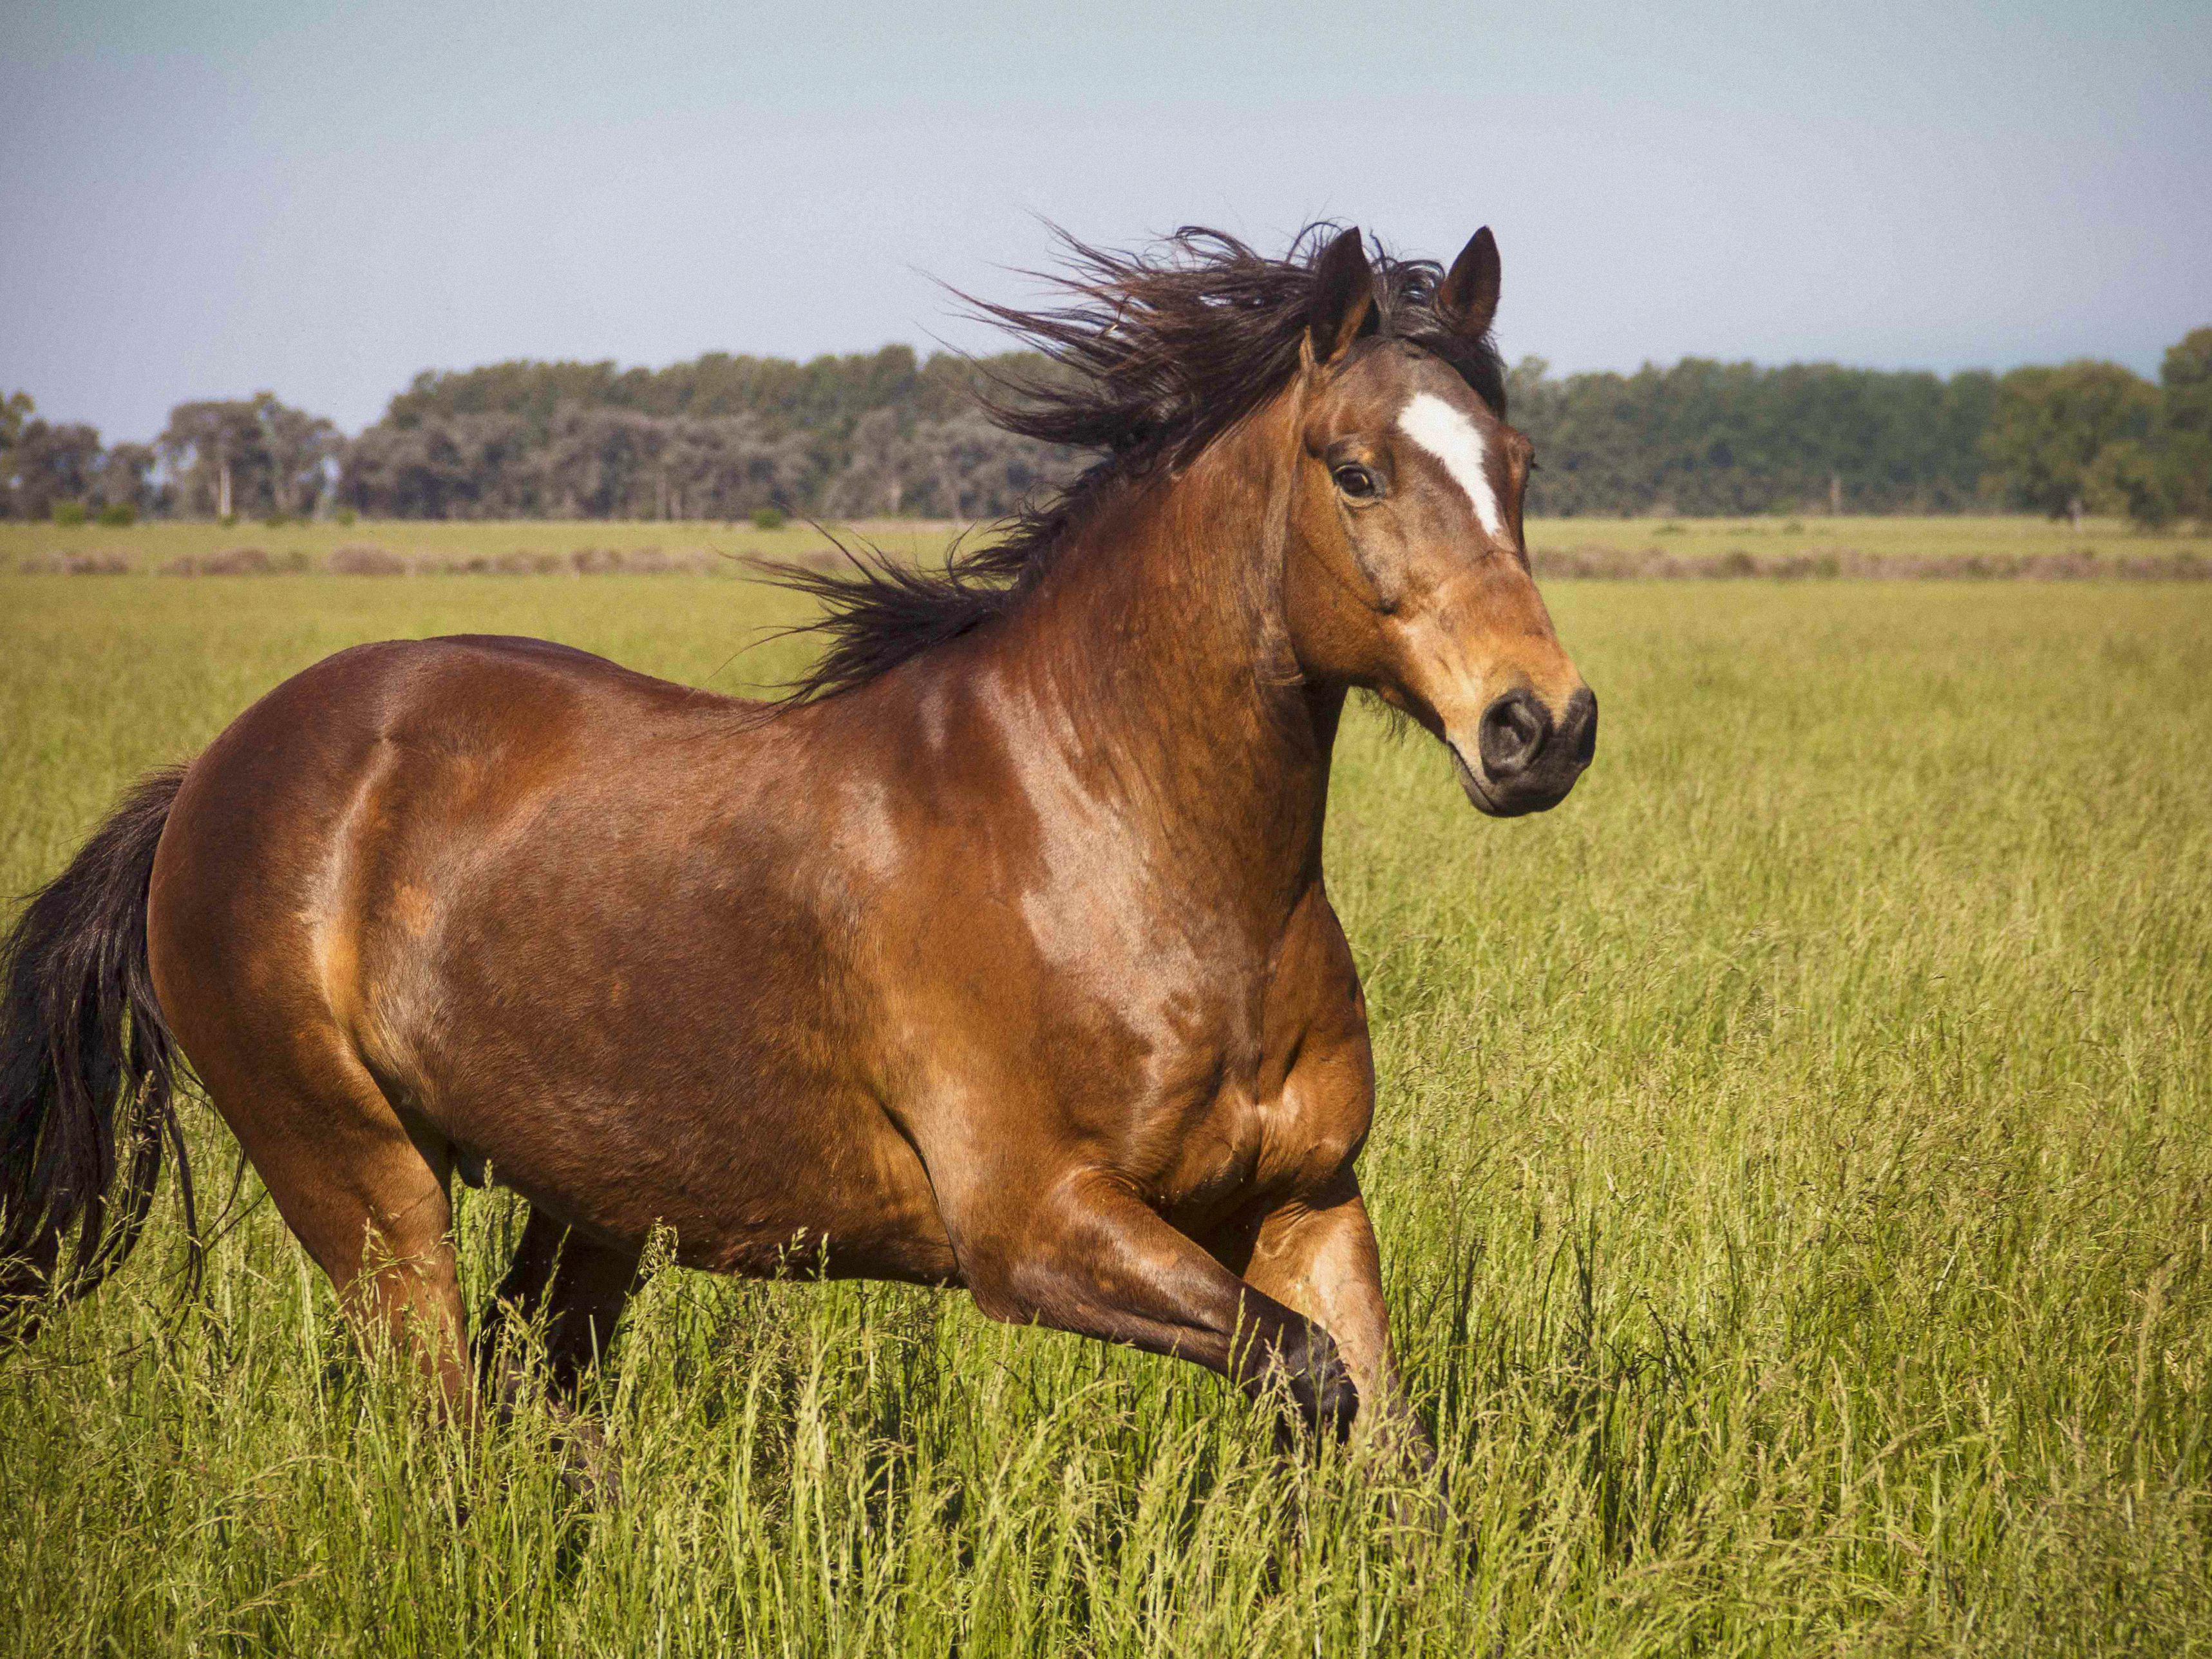

In [15]:
import numpy as np
from tensorflow.keras.preprocessing import image
from IPython.display import Image

# let's try a horse
path = '/Users/harryx113/Desktop/horse1.jpg'
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
    print("It is a human")
else:
    print("It is a horse")
Image(filename=path, width=400, height=400)
 

[0.]
It is a horse


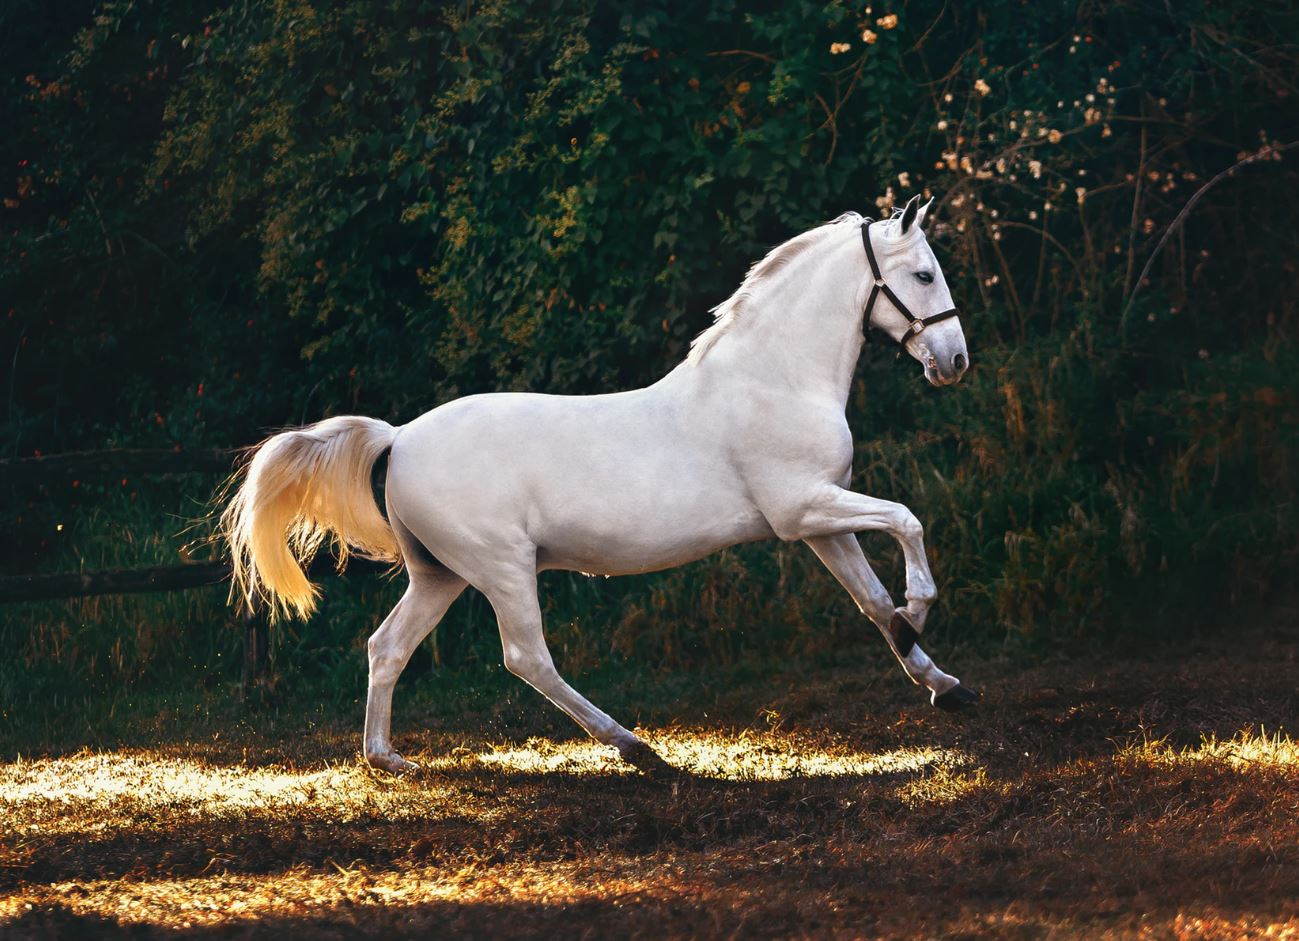

In [17]:
# another horse
path = '/Users/harryx113/Desktop/horse2.jpg'
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
    print("It is a human")
else:
    print("It is a horse")
Image(filename=path, width=400, height=400)

[1.]
It is a human


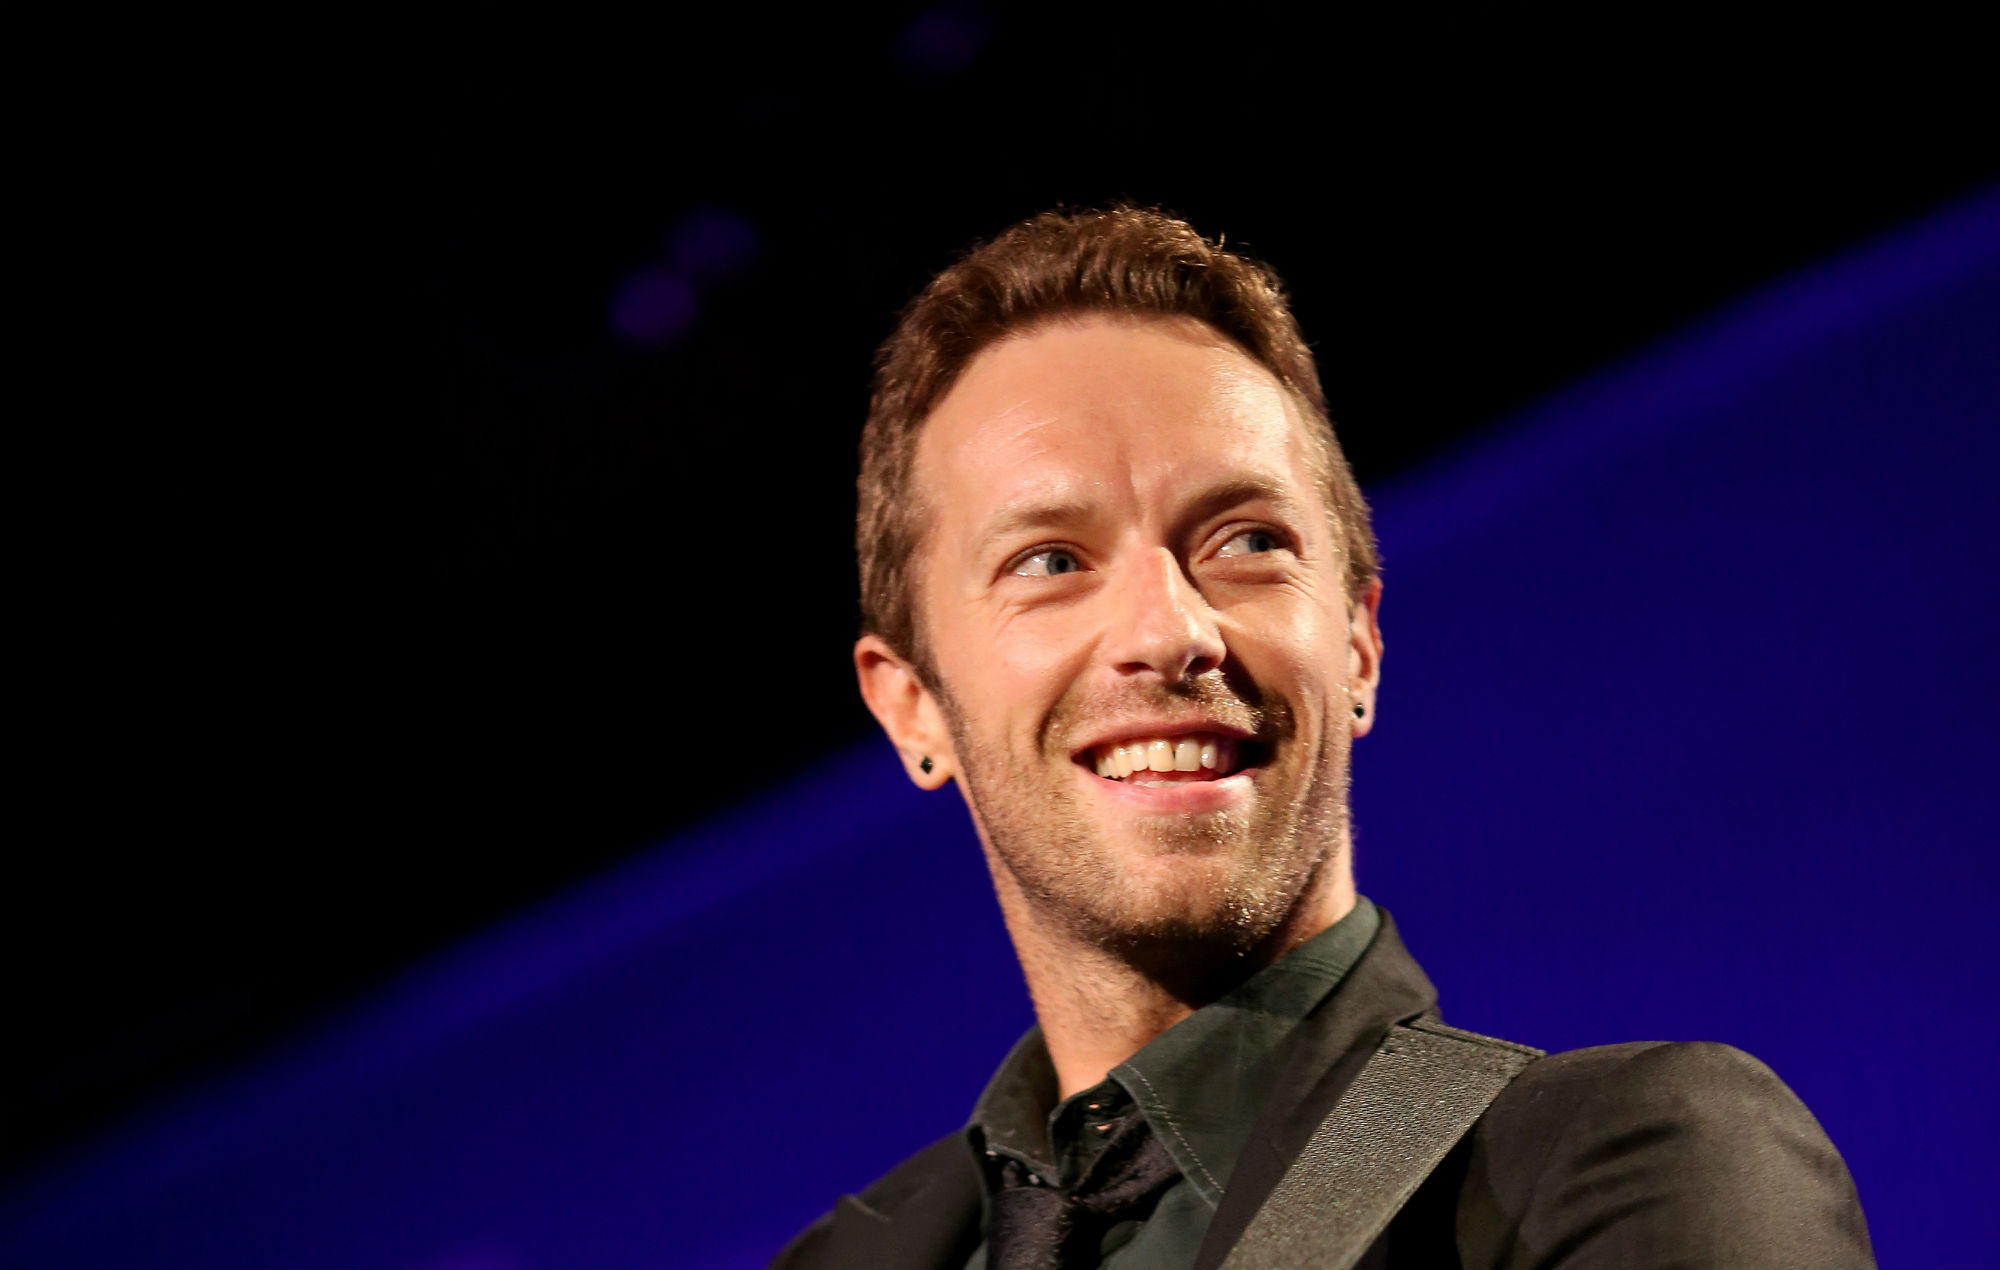

In [18]:
# what about Chris Martin
path = '/Users/harryx113/Desktop/human1.jpg'
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
    print("It is a human")
else:
    print("It is a horse")
Image(filename=path, width=400, height=400)

[1.]
It is a human


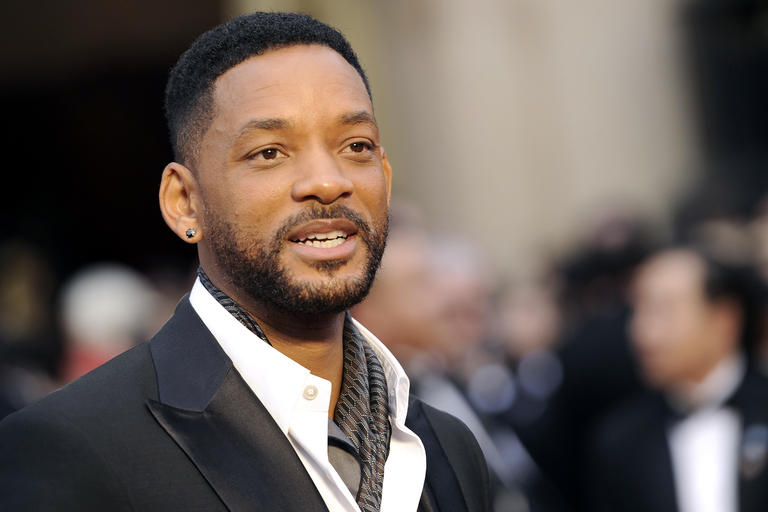

In [19]:
# Will Smith?
path = '/Users/harryx113/Desktop/human2.jpg'
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
    print("It is a human")
else:
    print("It is a horse")
Image(filename=path, width=400, height=400)

[1.]
It is a human


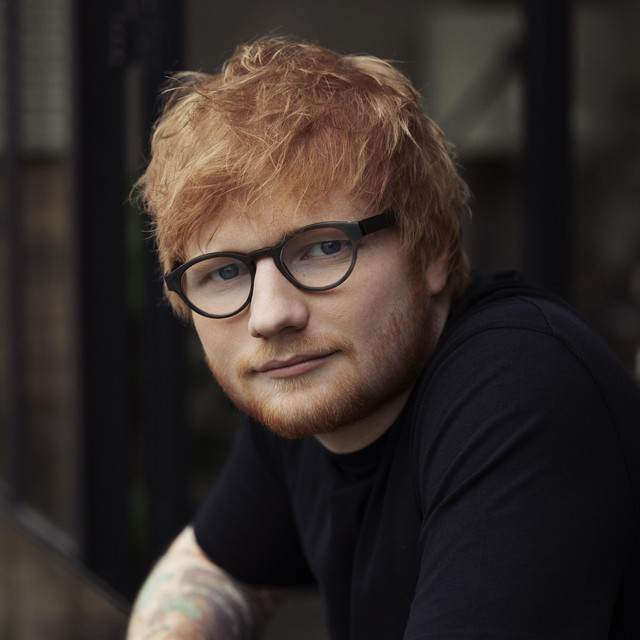

In [24]:
# Ed Sheeran?
path = '/Users/harryx113/Desktop/human3.jpeg'
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
    print("It is a human")
else:
    print("It is a horse")
Image(filename=path, width=400, height=400)

### Visualizing Intermediate Representations

We can take a look at how CNN extract features in each layer.

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


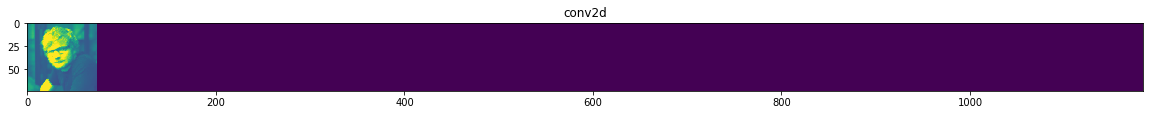

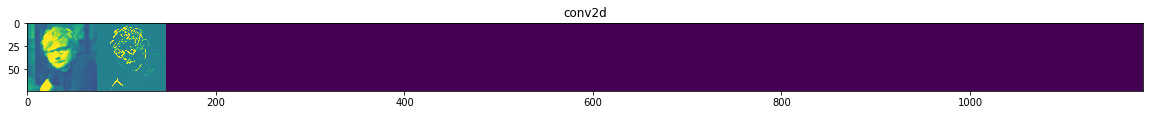

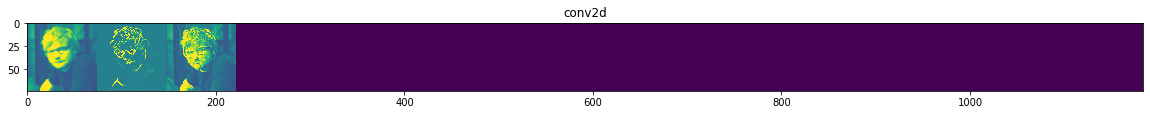

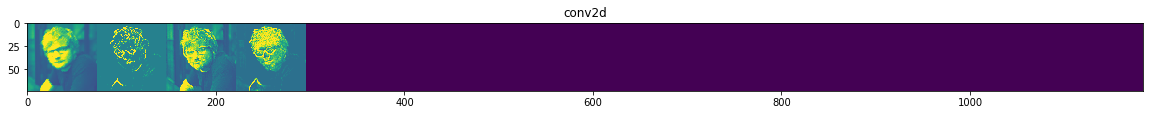

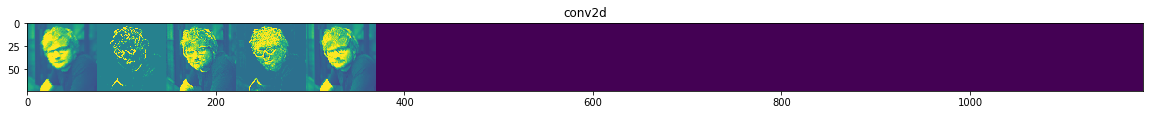

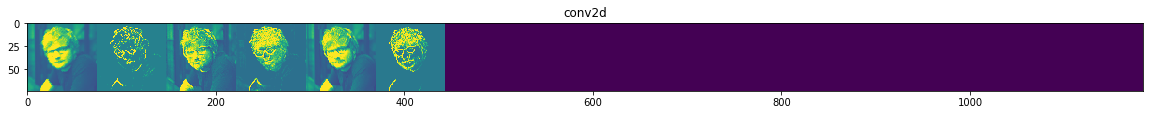

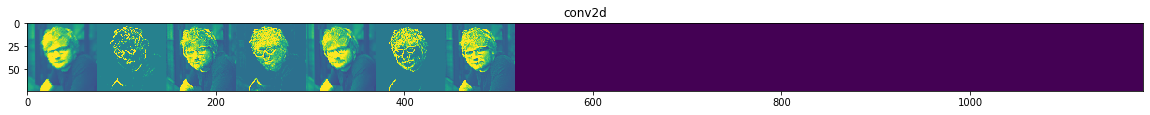

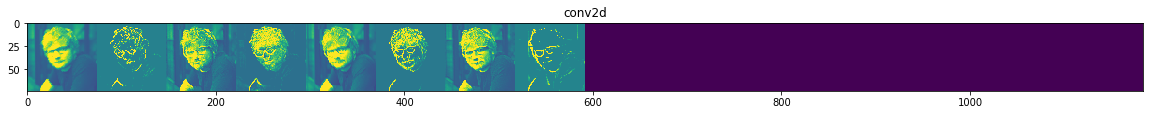

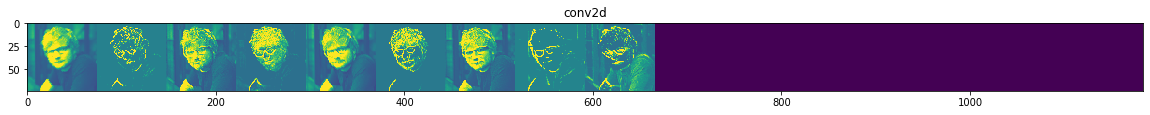

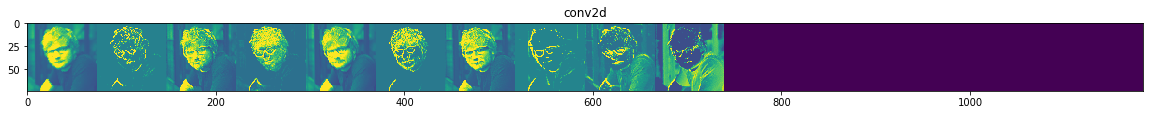

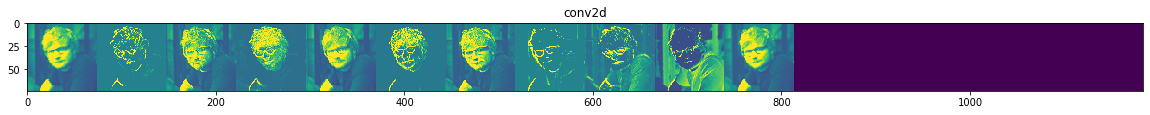

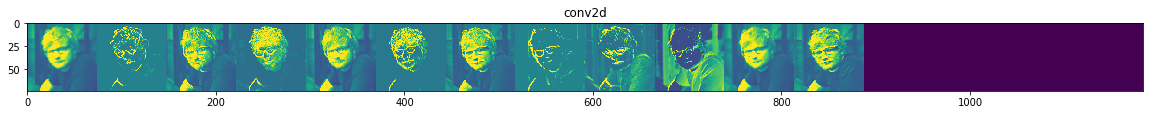

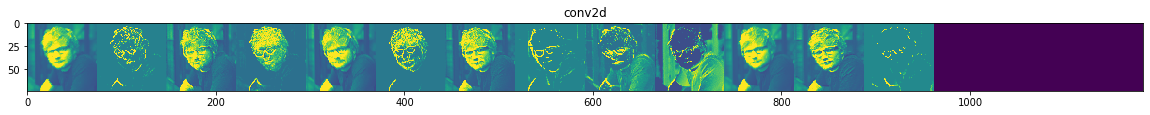

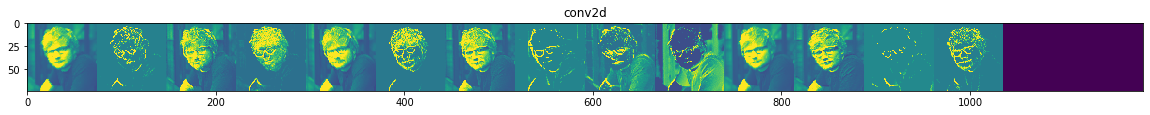

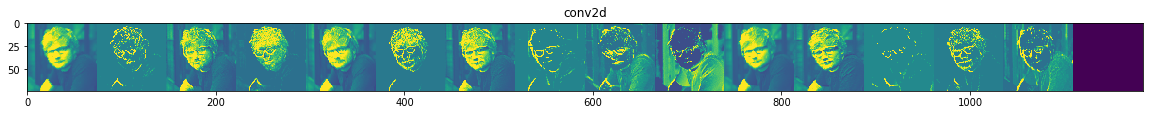

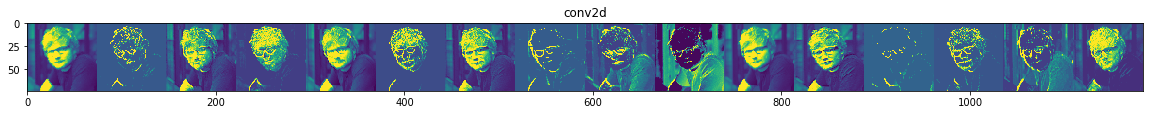

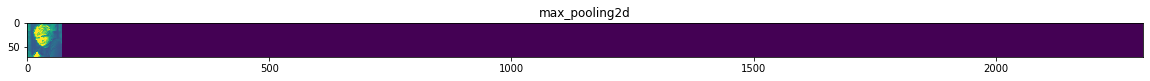

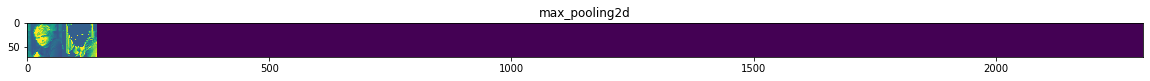

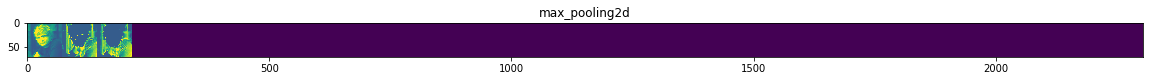

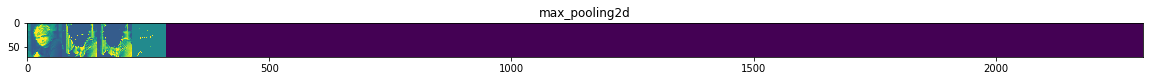

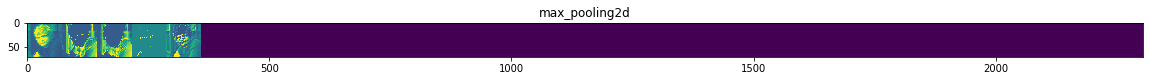

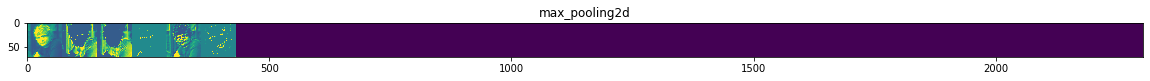

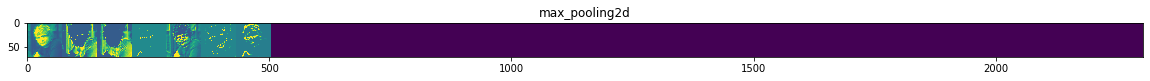

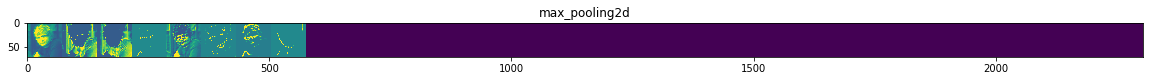

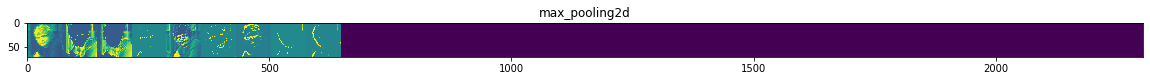

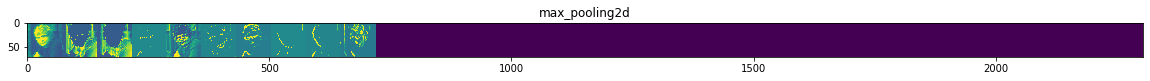

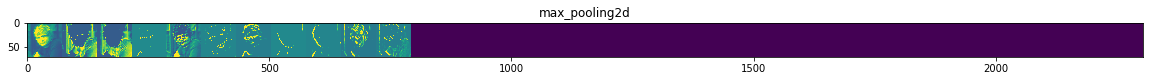

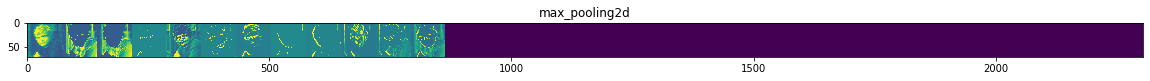

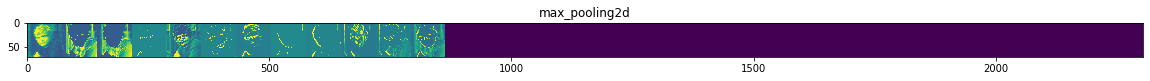

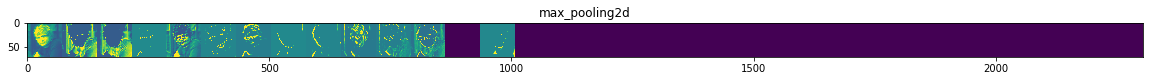

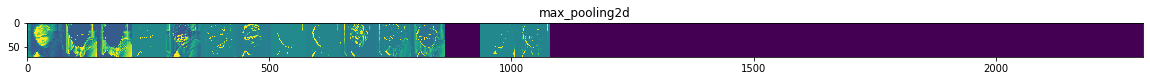

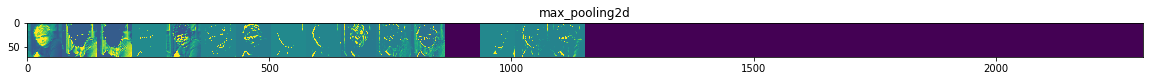

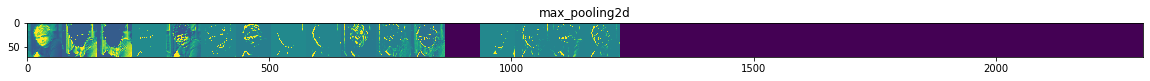

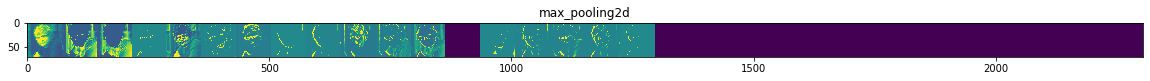

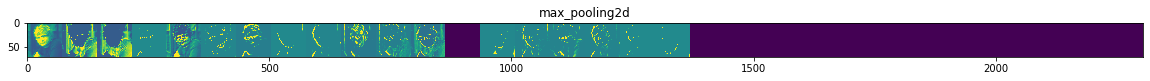

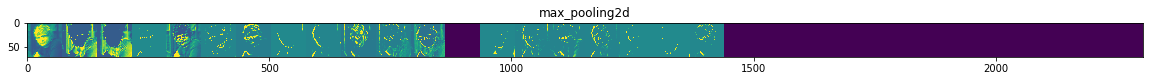

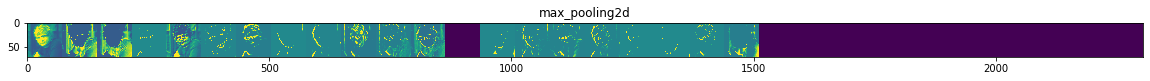

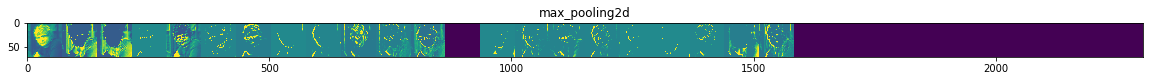

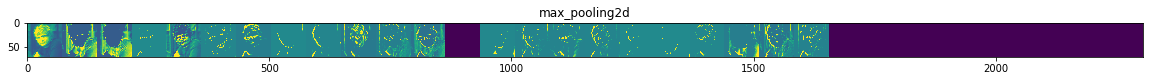

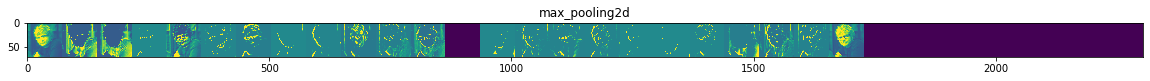

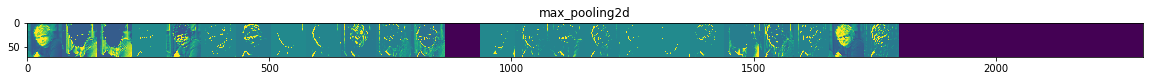

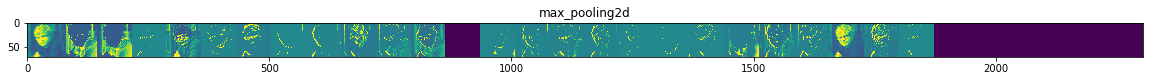

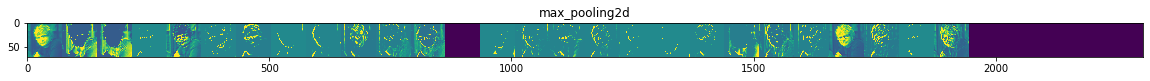

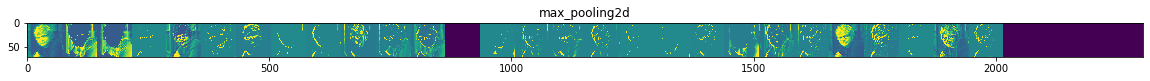

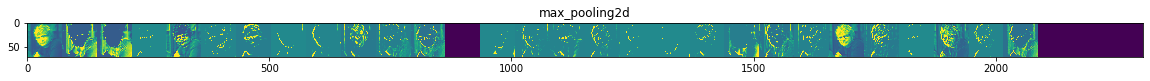

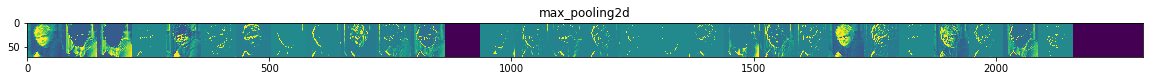

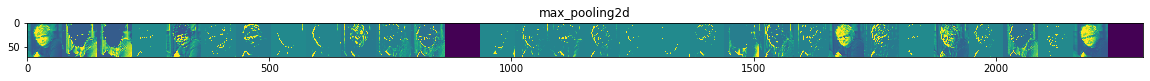

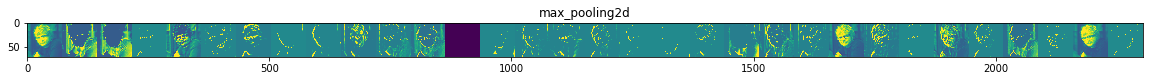

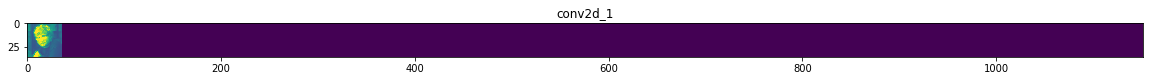

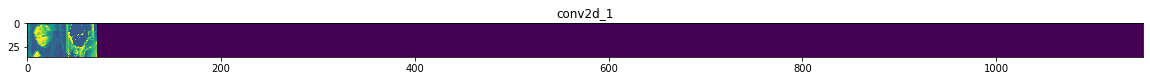

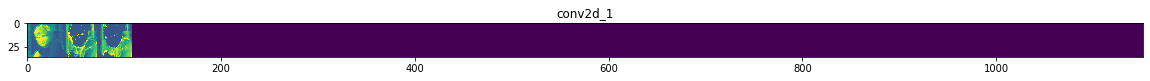

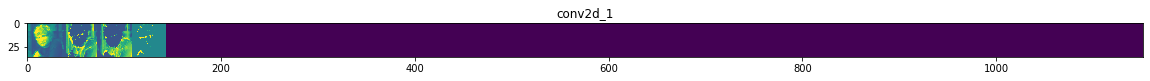

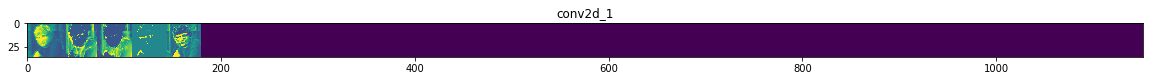

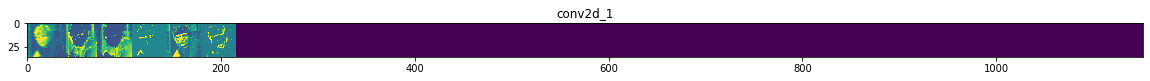

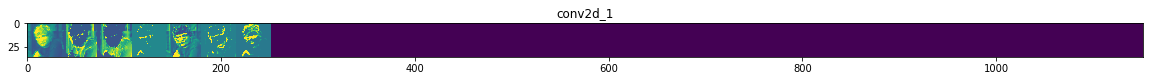

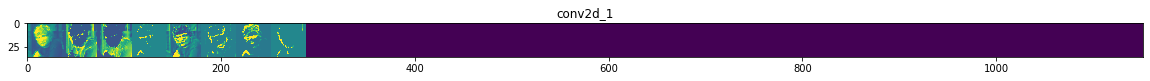

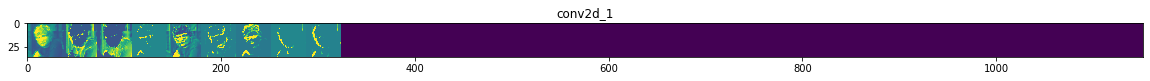

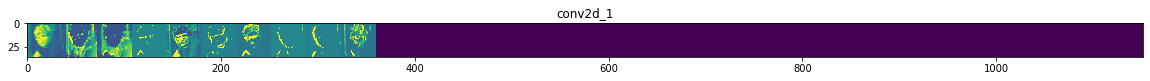

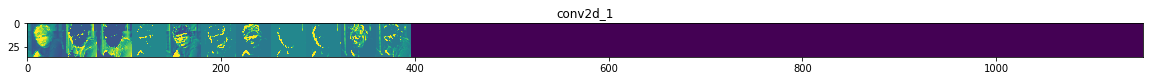

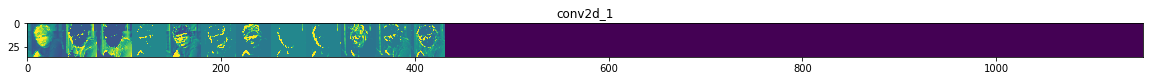

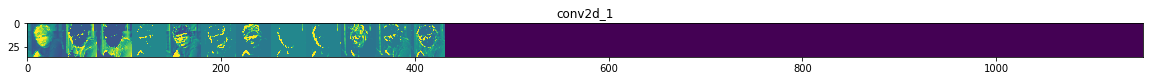

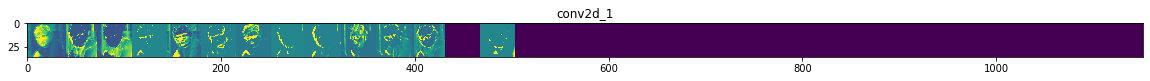

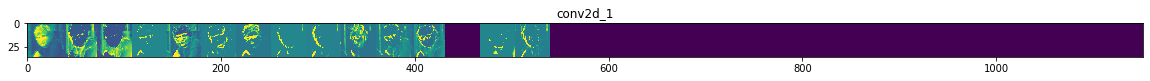

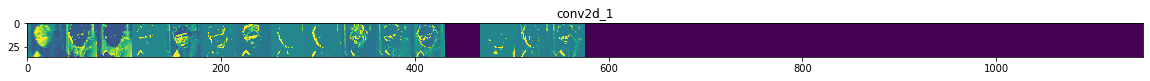

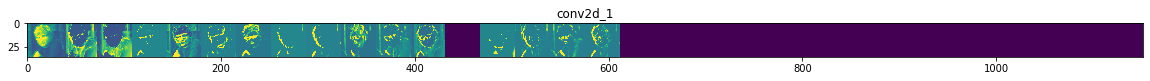

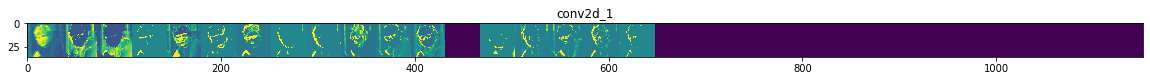

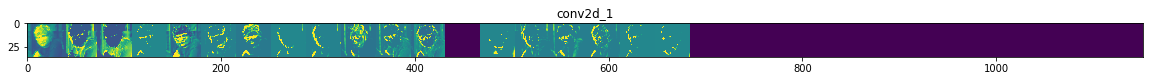

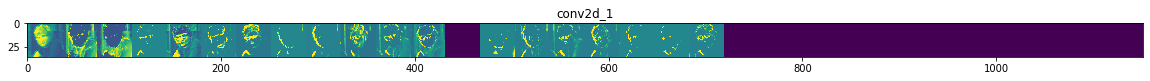

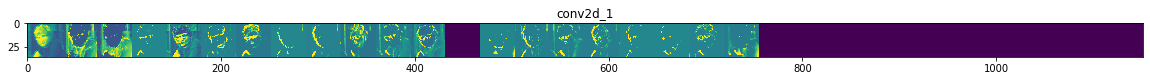

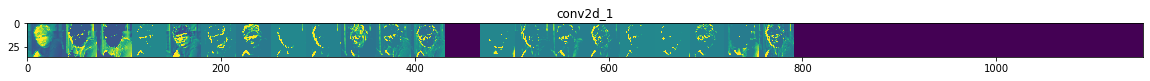

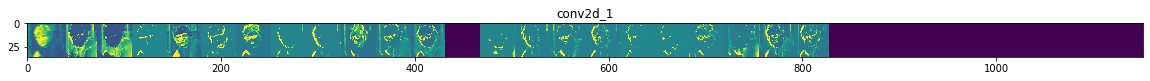

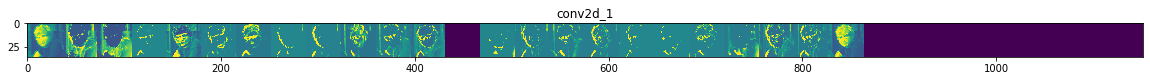

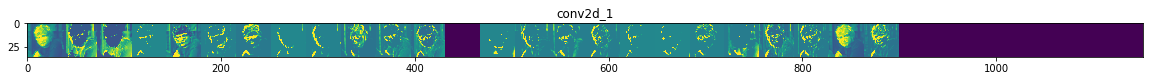

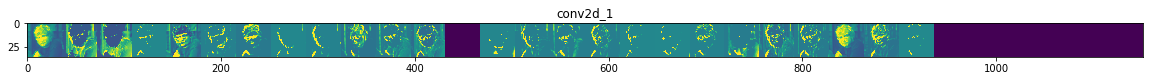

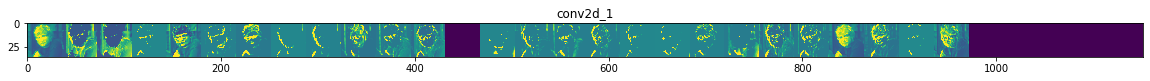

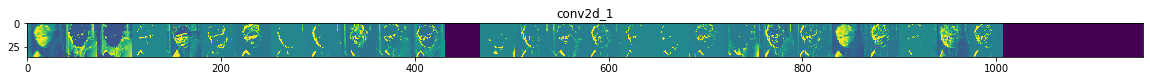

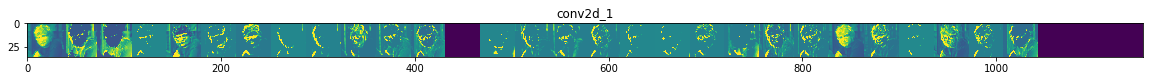

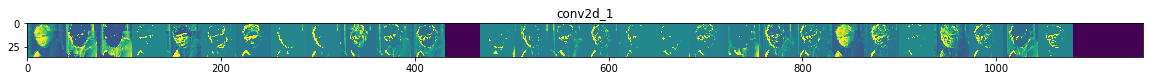

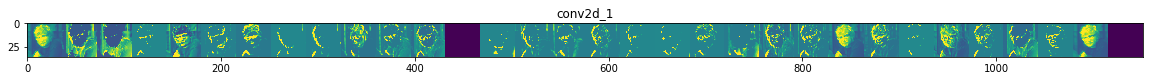

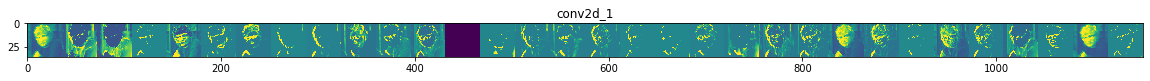

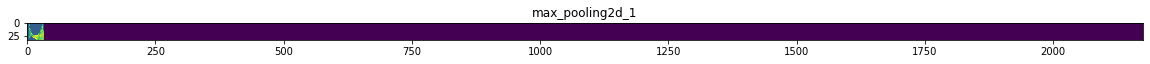

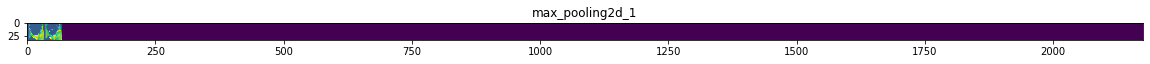

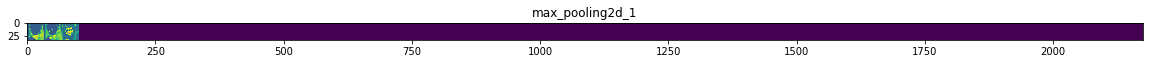

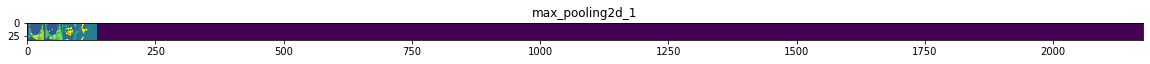

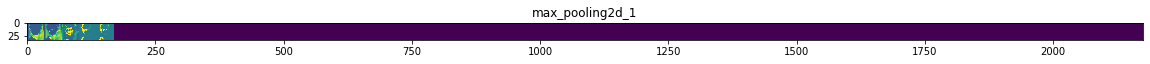

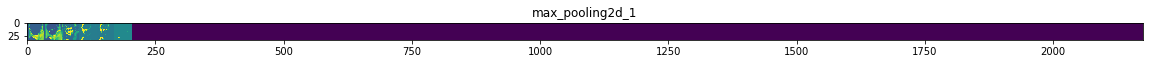

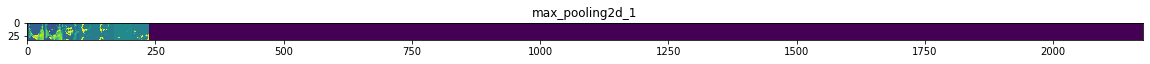

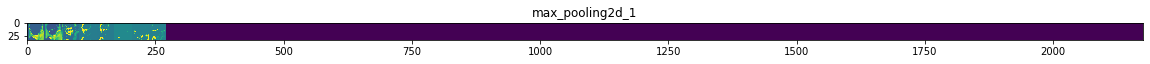

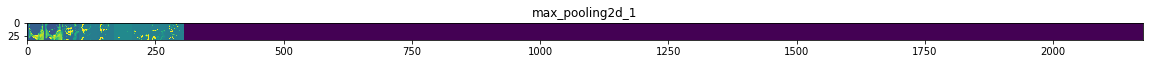

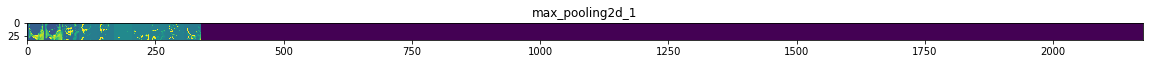

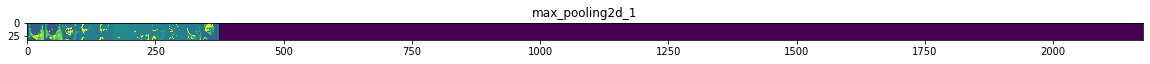

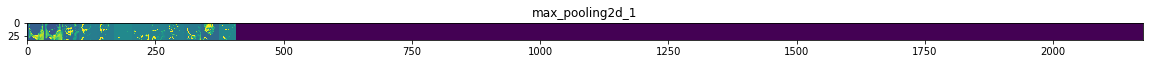

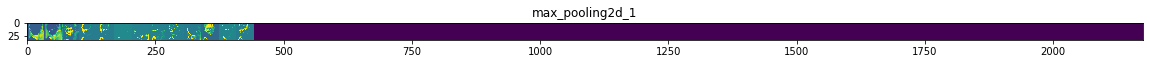

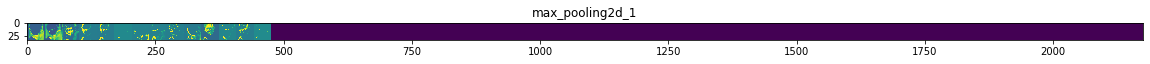

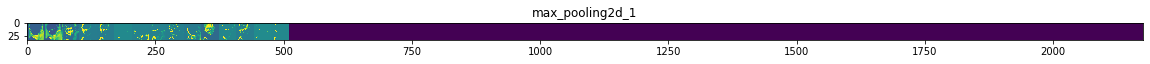

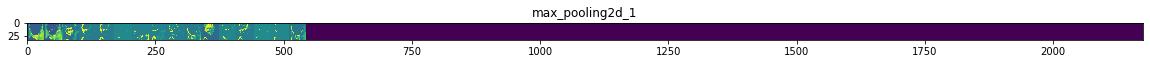

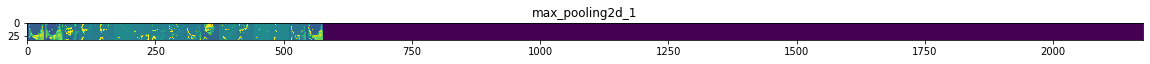

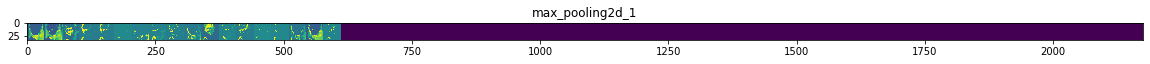

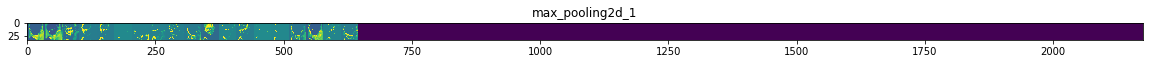

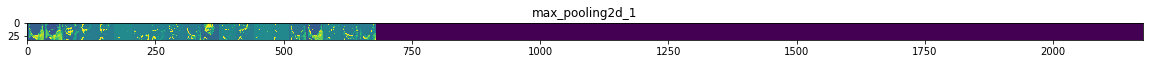

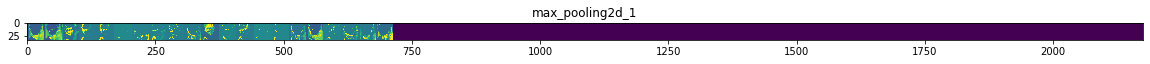

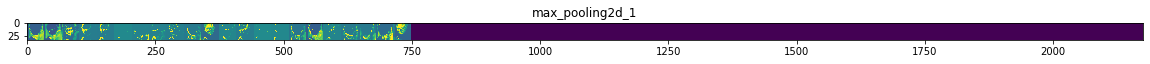

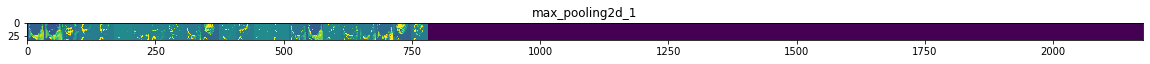

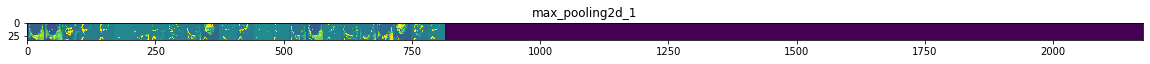

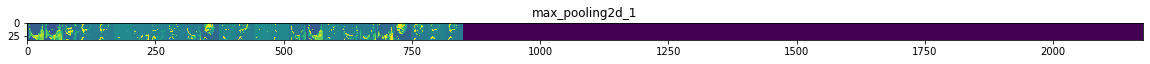

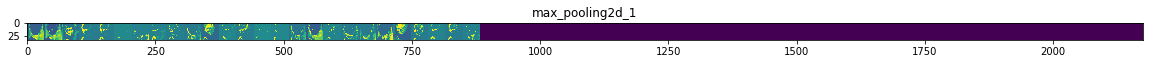

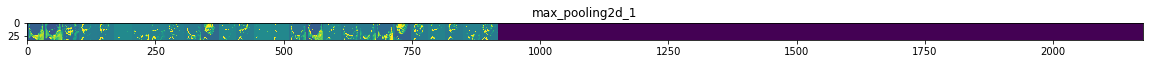

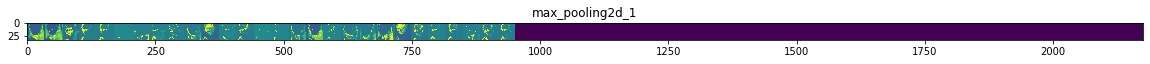

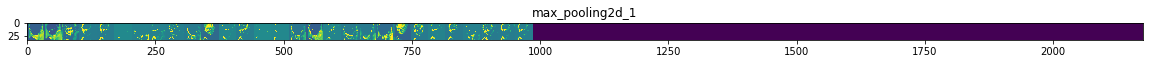

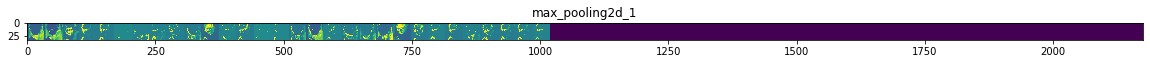

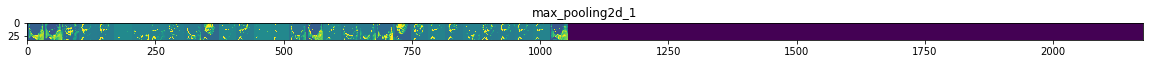

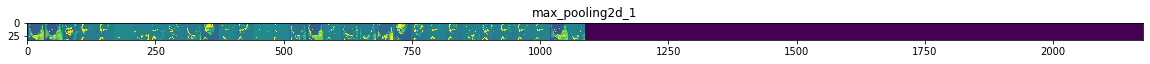

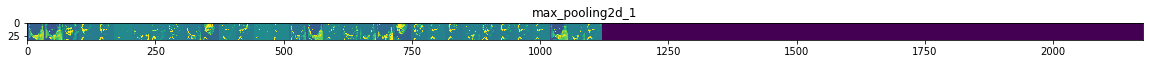

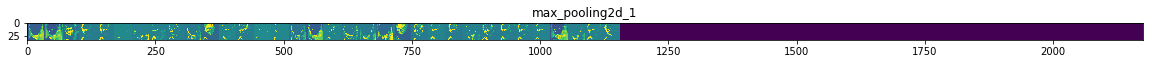

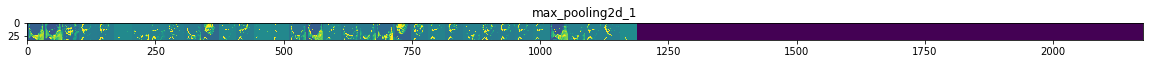

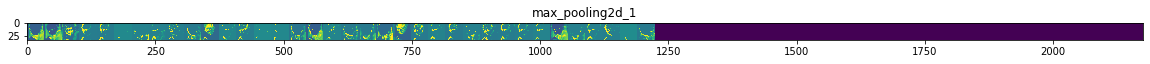

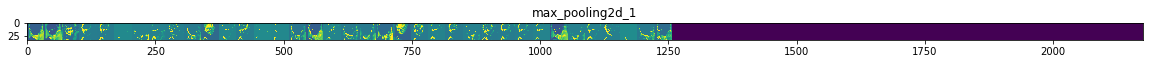

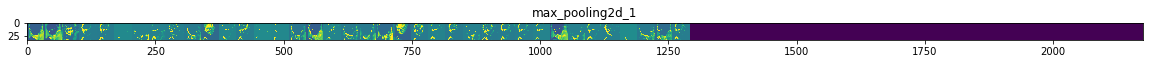

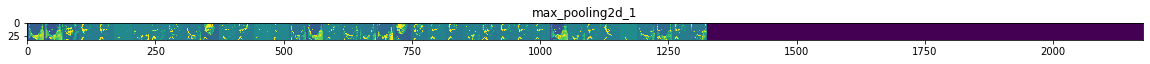

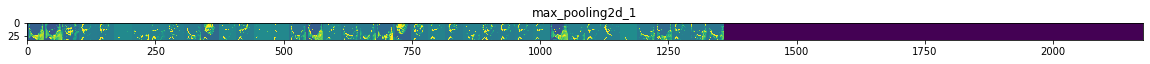

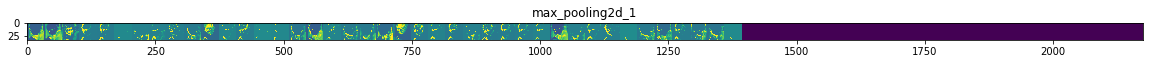

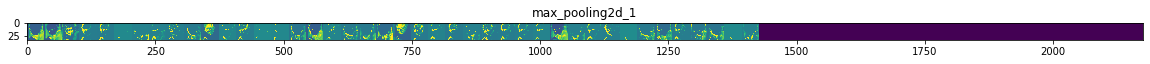

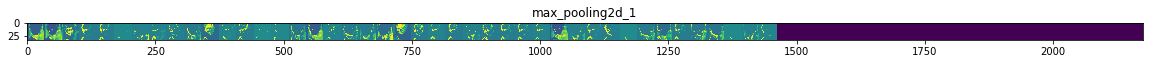

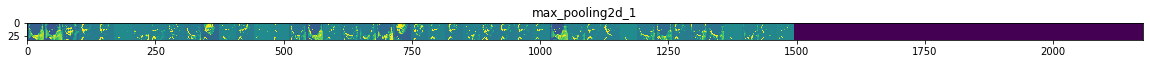

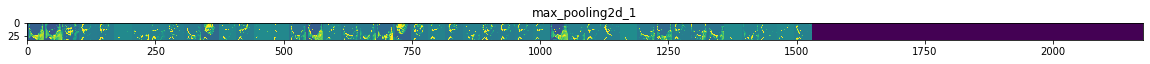

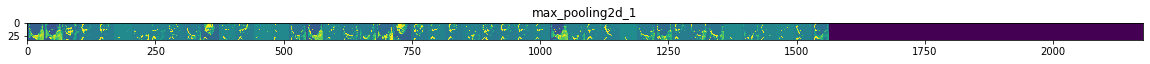

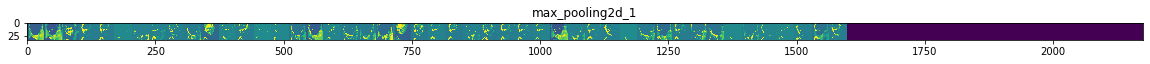

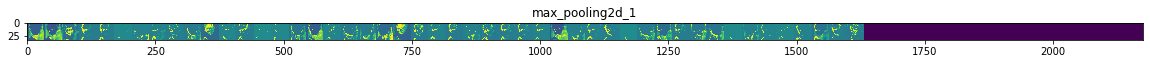

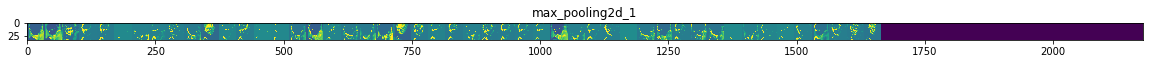

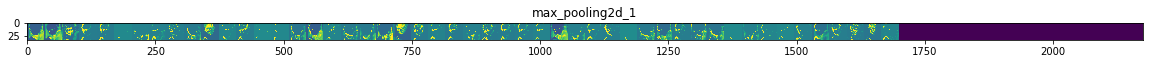

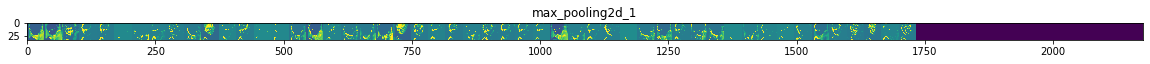

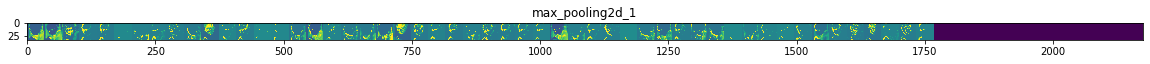

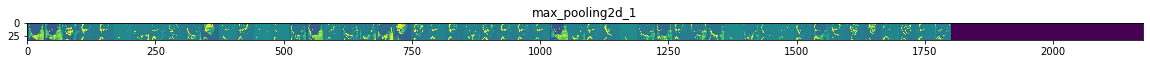

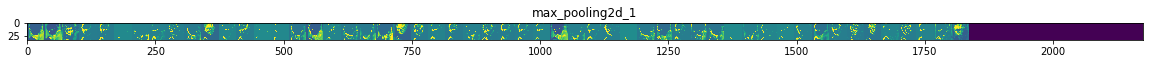

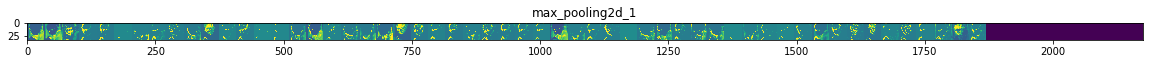

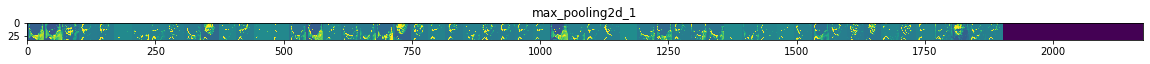

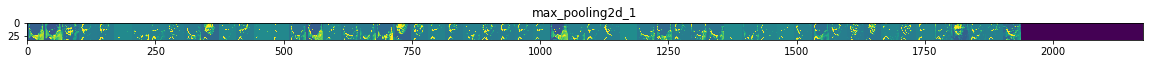

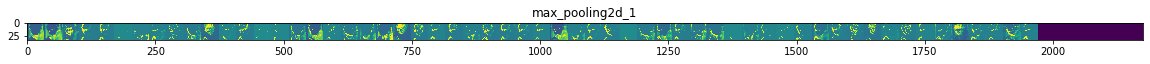

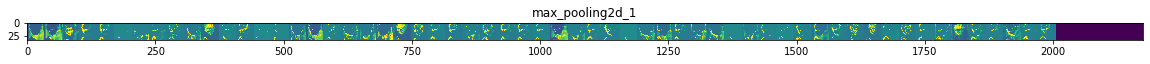

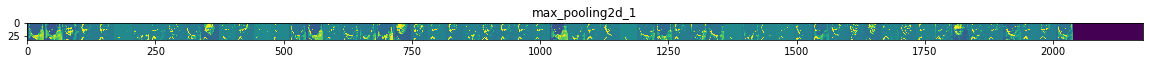

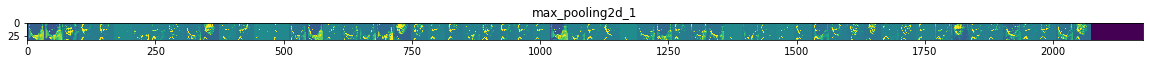

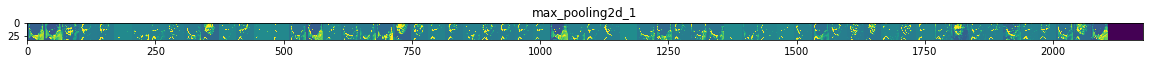

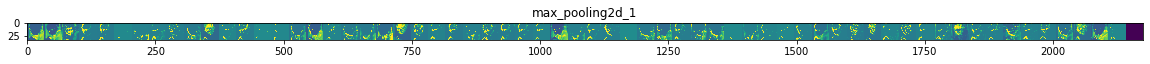

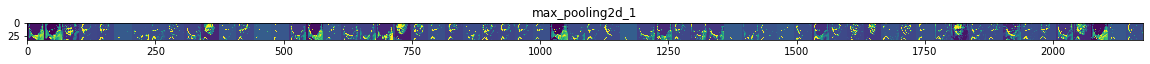

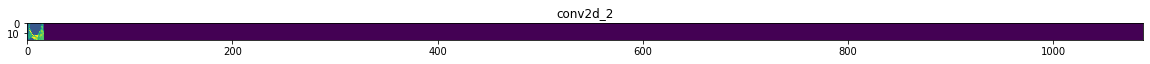

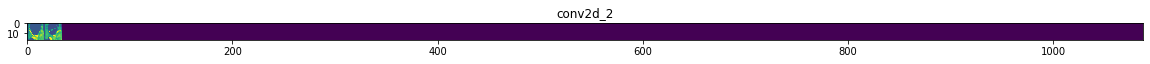

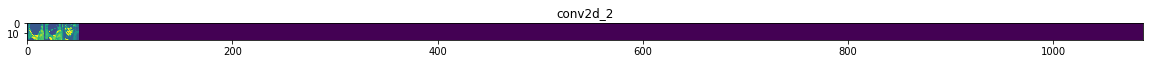

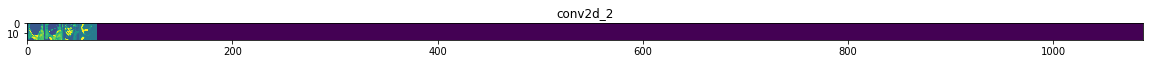

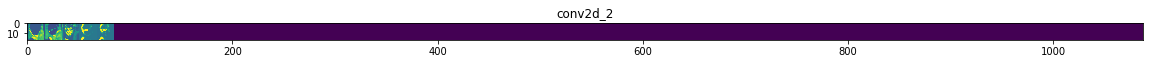

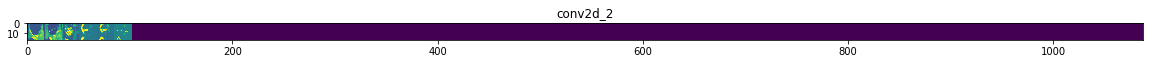

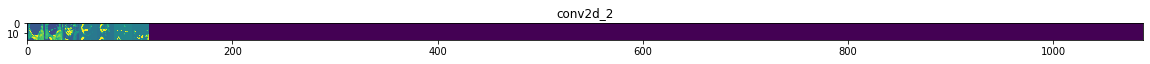

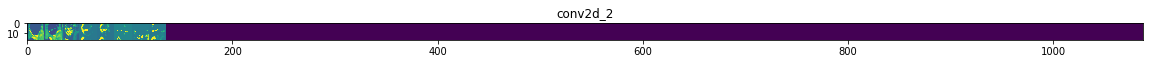

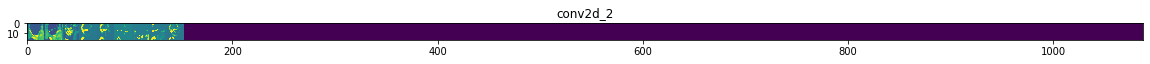

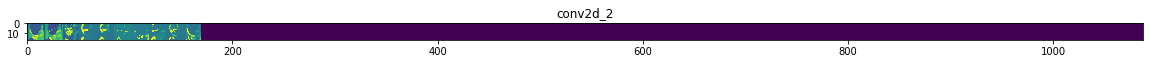

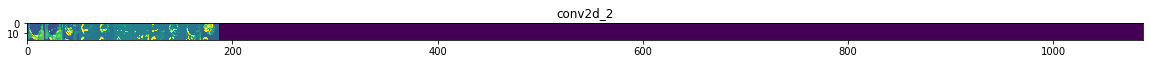

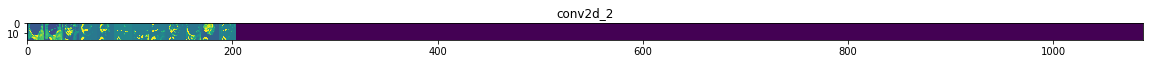

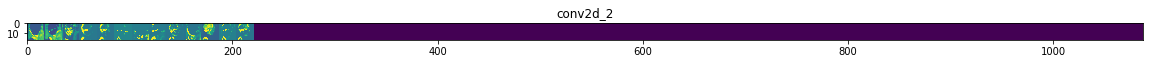

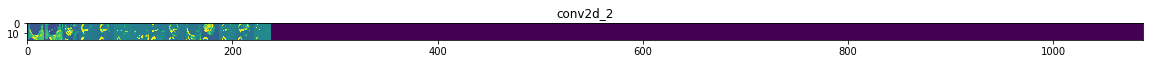

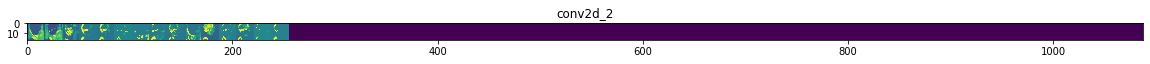

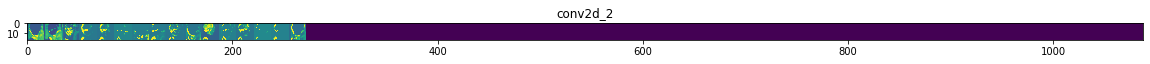

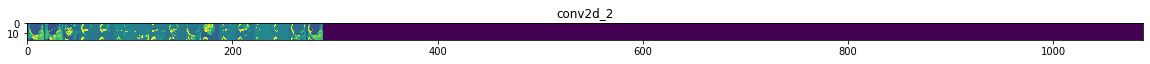

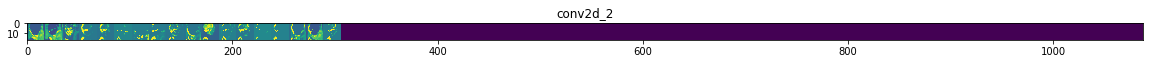

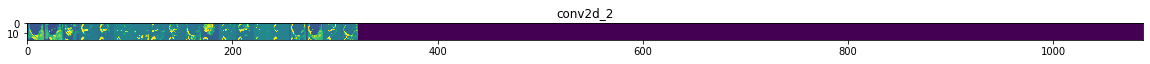

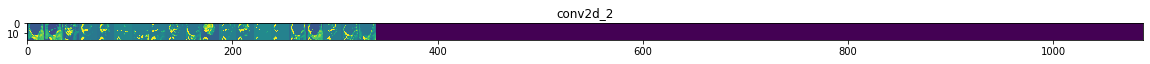

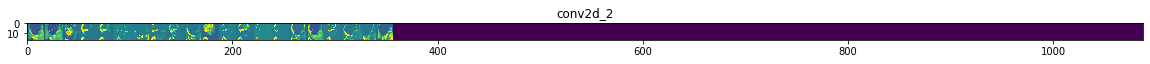

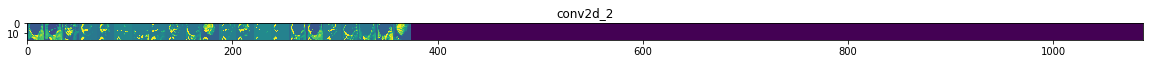

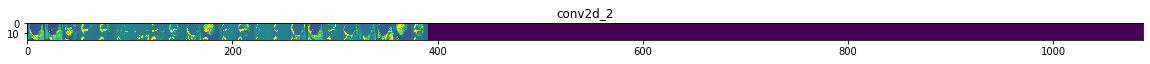

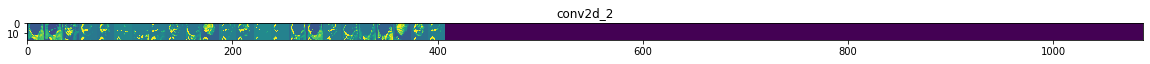

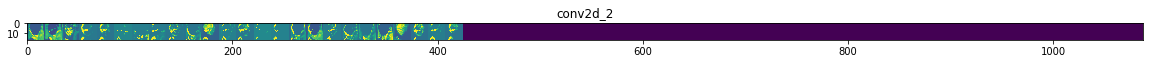

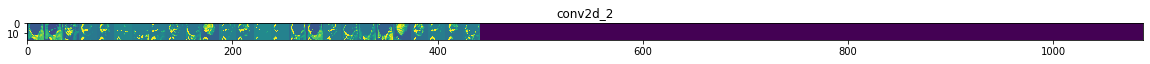

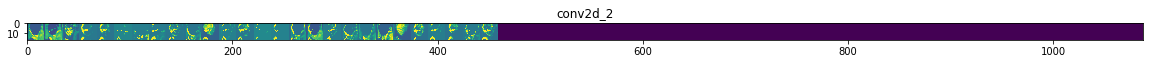

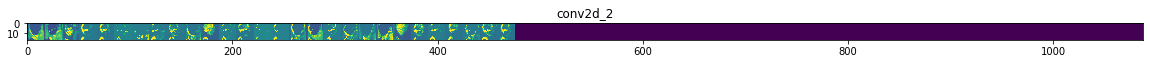

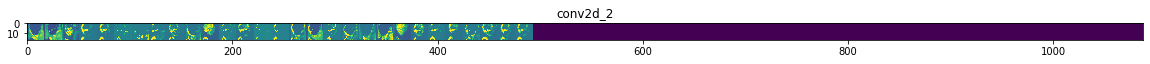

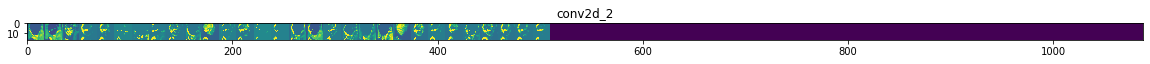

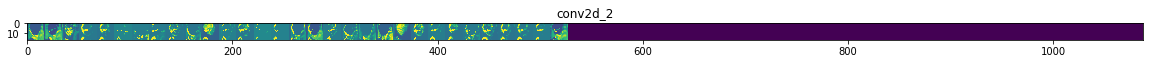

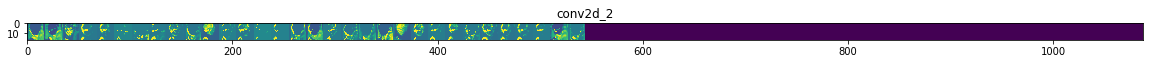

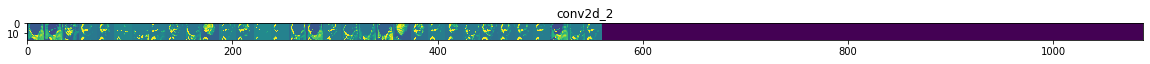

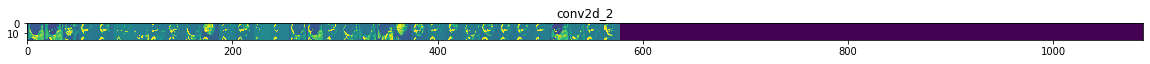

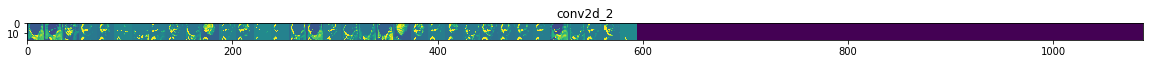

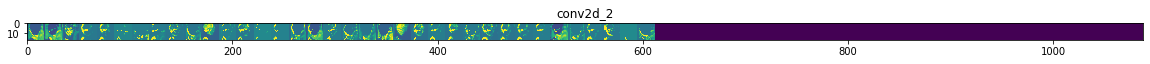

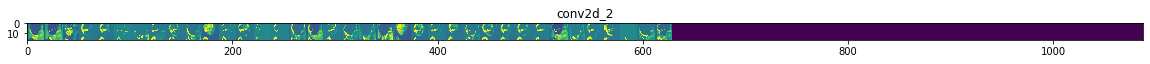

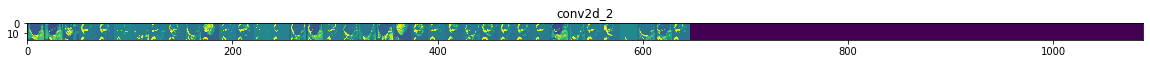

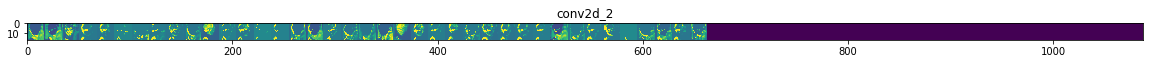

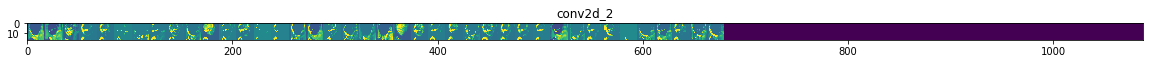

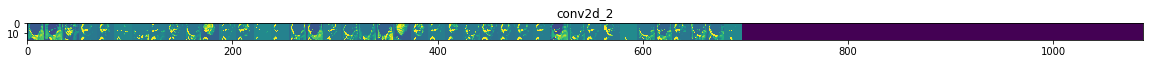

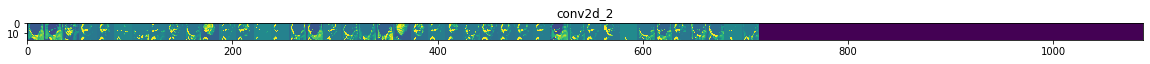

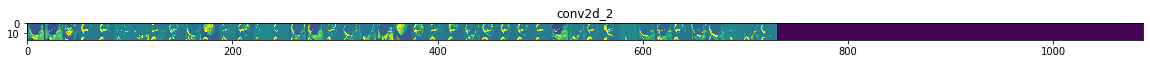

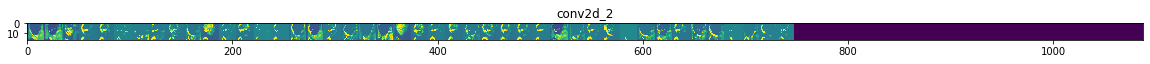

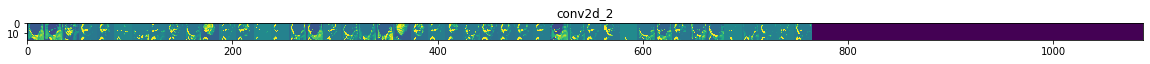

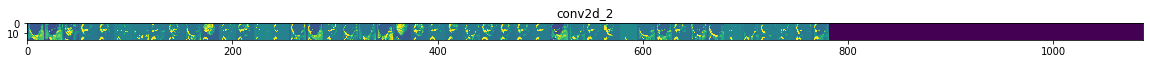

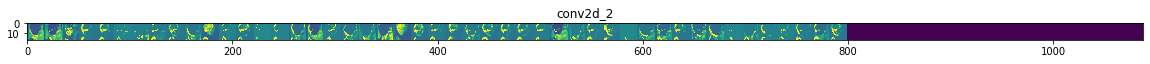

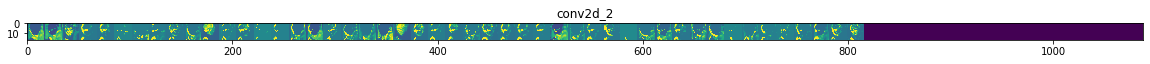

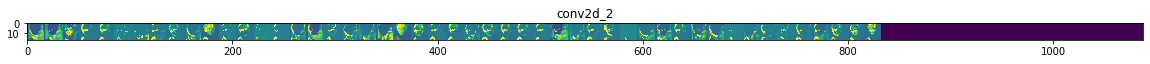

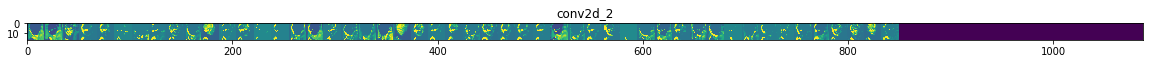

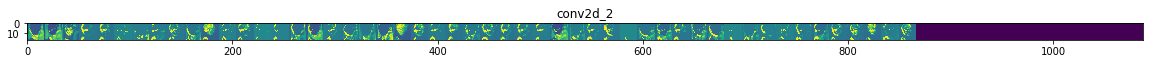

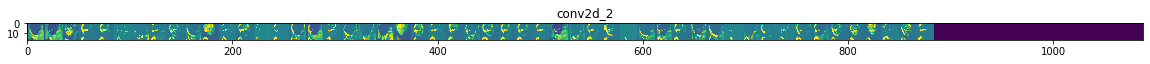

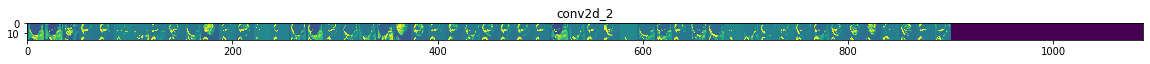

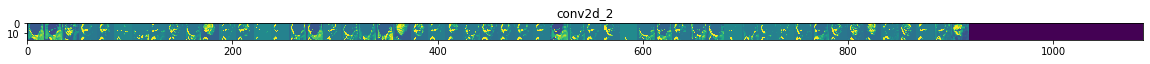

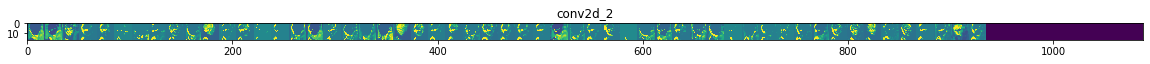

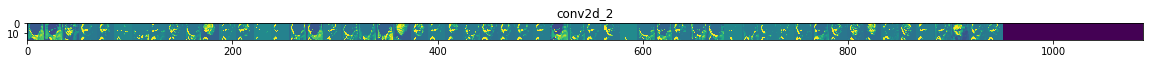

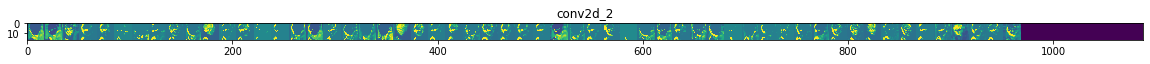

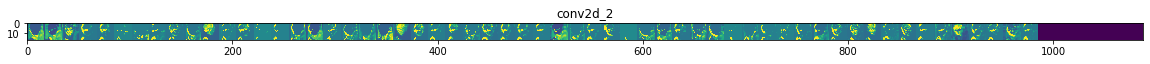

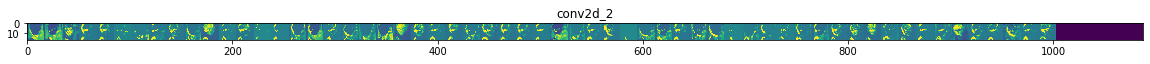

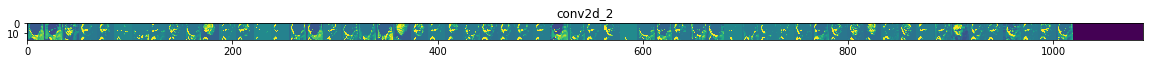

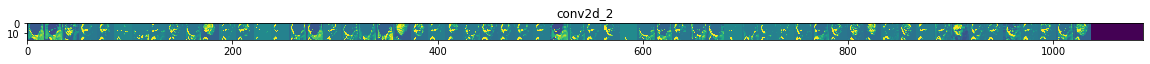

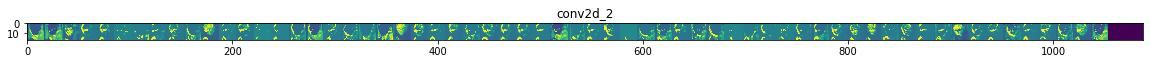

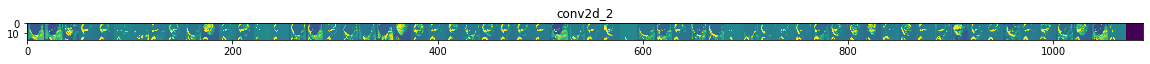

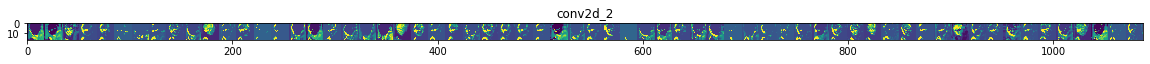

In [26]:
# Use our friend, Ed, as an example

import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

img = load_img('/Users/harryx113/Desktop/human3.jpeg', target_size=(150, 150))  
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        n_features = feature_map.shape[-1]  # number of features in feature map
        # The feature map has shape (1, size, size, n_features)
        size = feature_map.shape[1]
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            # Postprocess the feature to make it visually palatable
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            # We'll tile each filter into this big horizontal grid
            display_grid[:, i * size : (i + 1) * size] = x
            # Display the grid
            scale = 20. / n_features
            plt.figure(figsize=(scale * n_features, scale))
            plt.title(layer_name)
            plt.grid(False)
            plt.imshow(display_grid, aspect='auto', cmap='viridis')

The representations downstream start highlighting what the network pays attention to, and they show fewer and fewer features being activated with most being set to zero. Representation sparsity is a key feature of deep learning.


These representations carry increasingly less information about the original pixels of the image, but increasingly refined information about the class of the image. You can think of a convnet (or a deep network in general) as an information distillation pipeline. And that is how it knows Will Smith is not a horse!